# How are in-demand skills trending for Data Analysts?

## Methology

1.Aggregate skill counts monthly

2.Re-analyze based on percentage of total jobs

3.Plot the monthly skill demand

In [1]:
#Import Libraries
!pip install datasets
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

#loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [8]:
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}",3
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin...",6
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p...",8
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']...",9
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']},10
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['...",7
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1


In [9]:
df_DA_US_explode = df_DA_US.explode('job_skills')

In [22]:
df_DA_US_pivot = df_DA_US_explode.pivot_table(
    index='job_posted_month_no',
    columns= 'job_skills',
    aggfunc='size',
    fill_value= 0
)

df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_US_pivot.drop('Total', inplace=True)

df_DA_US_pivot


job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [25]:
DA_totals = df_DA_US.groupby('job_posted_month_no').size()
DA_totals

job_posted_month_no
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
dtype: int64

In [32]:
df_DA_US_Percent = df_DA_US_pivot.div(DA_totals/100 ,axis=0)
df_DA_US_Percent

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
2,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
5,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028
6,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.017596,0.000000,0.000000,0.017596,0.000000,0.000000,0.000000,0.000000,0.000000
7,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [35]:
df_plot  = df_DA_US_Percent.iloc[:,:5]

df_plot

job_skills,sql,excel,tableau,python,sas
job_posted_month_no,,,,,
1,54.167648,42.288674,29.291264,26.536379,21.568166
2,51.730895,42.243632,27.367734,26.420640,19.790986
3,51.881634,42.795111,29.012544,27.066581,19.909939
4,53.231939,42.139197,29.575136,27.756654,21.524219
5,51.692369,42.419387,28.680152,27.017825,19.467254
6,50.360725,41.914482,28.646841,28.312511,17.314799
7,50.163430,40.722938,29.475101,27.648529,19.150163
8,51.462165,41.166717,29.409105,30.524570,19.234248
9,49.471869,38.823022,29.165768,26.492779,18.452253


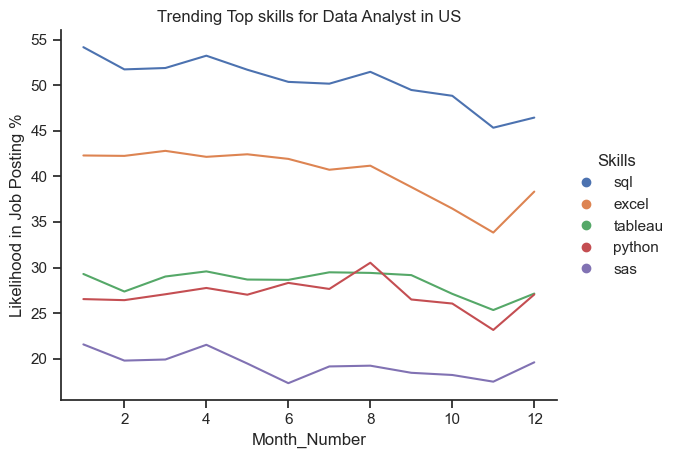

In [71]:
sns.lineplot(data=df_plot, dashes = False)
sns.set_theme(style ='ticks')
plt.title('Trending Top skills for Data Analyst in US')
plt.xlabel('Month_Number')
plt.ylabel('Likelihood in Job Posting %')
sns.despine()

handles, labels = plt.gca().get_legend_handles_labels()
bullet_handles = [plt.Line2D([0], [0], marker='o', color=h.get_color(), linestyle='') for h in handles]
plt.legend(bullet_handles, labels, loc='center left', bbox_to_anchor=(1, 0.5),title='Skills', frameon=False)

plt.show()
